In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main, data_loader_inout

## Flow

In [61]:
# flow_all_random, speed_all_random, occupancy_all_random, flow_dt_random, speed_dt_random, occupancy_dt_random = data_loader_main(csv_dict='Sim_Results/Ramp_Random')
flow_all_open, speed_all_open, occupancy_all_open, flow_dt_open, speed_dt_open, occupancy_dt_open = data_loader_main(csv_dict='Sim_Results/Ramp_Open')
flow_all_ALIANA, speed_all_ALIANA, occupancy_all_ALIANA, flow_dt_ALIANA, speed_dt_ALIANA, occupancy_dt_ALIANA = data_loader_main(csv_dict='Sim_Results/Ramp_ALIANA')
flow_all_MPC, speed_all_MPC, occupancy_all_MPC, flow_dt_MPC, speed_dt_MPC, occupancy_dt_MPC = data_loader_main(csv_dict='Sim_Results/Ramp_MPC')
flow_all_MPC_R, speed_all_MPC_R, occupancy_all_MPC_R, flow_dt_MPC_R, speed_dt_MPC_R, occupancy_dt_MPC_R = data_loader_main(csv_dict='Sim_Results/Ramp_MPCRefine')


In [62]:
flow_inout_open, speed_inout_open, occupancy_inout_open, flow_dt_inoput_open, speed_dt_inout_open, occupancy_dt_inout_open = data_loader_inout(csv_dict='Sim_Results/Ramp_Open')
flow_inout_ALIANA, speed_inout_ALIANA, occupancy_inout_ALIANA, flow_dt_inoput_ALIANA, speed_dt_inout_ALIANA, occupancy_dt_inout_ALIANA = data_loader_inout(csv_dict='Sim_Results/Ramp_ALIANA')
flow_inout_MPC, speed_inout_MPC, occupancy_inout_MPC, flow_dt_inoput_MPC, speed_dt_inout_MPC, occupancy_dt_inout_MPC = data_loader_inout(csv_dict='Sim_Results/Ramp_MPC')

In [63]:
# num_rows_to_remove = len(flow_all_open) // 4
# 
# # Remove the first quarter of the rows
# flow_all_open = flow_all_open.iloc[num_rows_to_remove:].reset_index(drop=True)
# flow_all_ALIANA = flow_all_ALIANA.iloc[num_rows_to_remove:].reset_index(drop=True)
# flow_all_MPC = flow_all_MPC.iloc[num_rows_to_remove:].reset_index(drop=True)
# flow_all_MPC_R = flow_all_MPC_R.iloc[num_rows_to_remove:].reset_index(drop=True)


In [64]:
# control_input_Random = pd.read_csv('Results/Meter_Rate_Random.csv')
control_input_ALIANA = pd.read_csv('Results/Meter_Rate_ALIANA.csv')
control_input_MPC = pd.read_csv('Results/Meter_Rate_MPC.csv')
control_input_MPC_R = pd.read_csv('Results/Meter_Rate_MPCRefine.csv')

In [65]:
control_input_ALIANA, control_input_MPC, control_input_MPC_R = (control_input_ALIANA.iloc[1:,:], control_input_MPC.iloc[1:,:], control_input_MPC_R.iloc[1:,:])

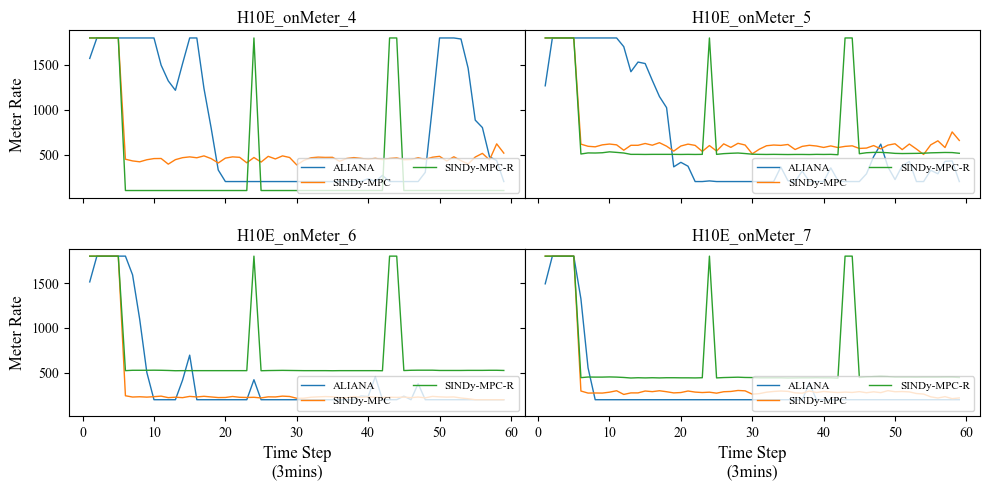

In [66]:
plt.show()
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(2):
        index = row*2 + col
        # axs[row, col].plot(control_input_Random.iloc[:, index], "--", label='Random', linewidth=1)
        axs[row, col].plot(control_input_ALIANA.iloc[:, index], "-", label='ALIANA', linewidth=1)
        axs[row, col].plot(control_input_MPC.iloc[:, index], "-", label='SINDy-MPC',linewidth=1)
        axs[row, col].plot(control_input_MPC_R.iloc[:, index], "-", label='SINDy-MPC-R',linewidth=1)
        # axs[row, col].plot(control_input_MPC_R2.iloc[:, index], "-", label='SINDy-MPC-R2',linewidth=1)
        axs[row, col].set_title(control_input_ALIANA.columns[index], fontsize=12)
        axs[row, col].legend(loc='lower right', fontsize=8, ncol=2)

for col in range(2):
    axs[1, col].set_xlabel('Time Step\n(3mins)', fontsize=12)

for row in range(2):
    axs[row, 0].set_ylabel('Meter Rate', fontsize=12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Ramp_Rate.png', dpi=300)

In [67]:
flow_summary = pd.DataFrame(flow_all_open.mean(axis=0), columns=['No_Control'])
flow_summary['ALIANA'] = flow_all_ALIANA.mean(axis=0)
flow_summary['sindy-MPC'] = flow_all_MPC.mean(axis=0)
flow_summary['SINDy-MPC-R'] = flow_all_MPC_R.mean(axis=0)

In [68]:
occupancy_summary = pd.DataFrame(occupancy_all_open.mean(axis=0), columns=['No_Control'])
occupancy_summary['ALIANA'] = occupancy_all_ALIANA.mean(axis=0)
occupancy_summary['sindy-MPC'] = occupancy_all_MPC.mean(axis=0)
occupancy_summary['SINDy-MPC-R'] = occupancy_all_MPC_R.mean(axis=0)

In [69]:
flow_summary

,No_Control,ALIANA,sindy-MPC,SINDy-MPC-R
H10E_4,5917.118644,7230.508475,7016.440678,6607.627119
H10E_5,6524.745763,7630.169492,7541.186441,7222.372881
H10E_6,7243.728814,7986.610169,7869.661017,7914.915254
H10E_7,7483.220339,7639.322034,7587.457627,7595.084746


In [70]:
flow_summary.mean(axis=0)

No_Control     6792.203390
ALIANA         7621.652542
sindy-MPC      7503.686441
SINDy-MPC-R    7335.000000
dtype: float64

In [71]:
# moving average
window_size = 10
flow_all_open = flow_all_open.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
flow_all_ALIANA = flow_all_ALIANA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
flow_all_MPC = flow_all_MPC.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
flow_all_MPC_R = flow_all_MPC_R.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

occupancy_all_open = occupancy_all_open.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
occupancy_all_ALIANA = occupancy_all_ALIANA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
occupancy_all_MPC = occupancy_all_MPC.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
occupancy_all_MPC_R = occupancy_all_MPC_R.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

speed_all_open = speed_all_open.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
speed_all_ALIANA = speed_all_ALIANA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
speed_all_MPC = speed_all_MPC.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
speed_all_MPC_R = speed_all_MPC_R.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()


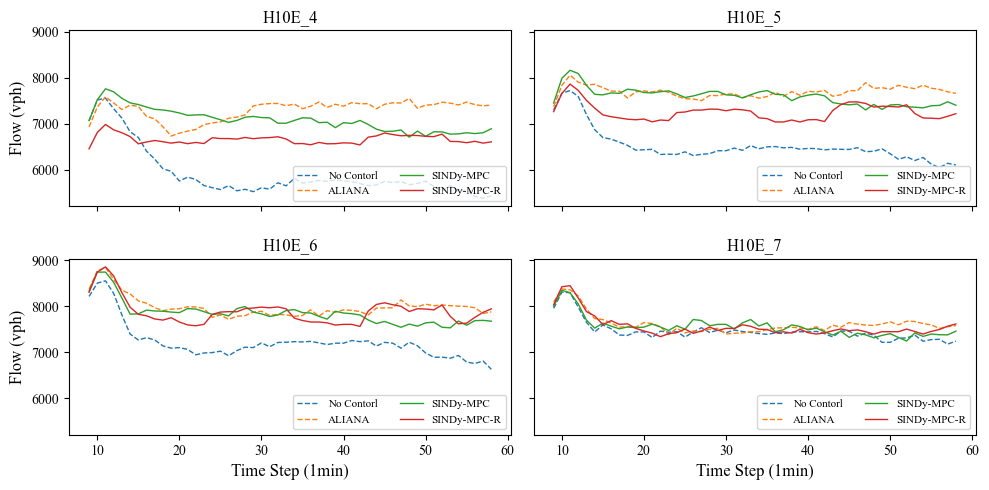

In [72]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(2):
        index = row*2 + col
        # axs[row, col].plot(flow_all_random.iloc[:, index], "-", label = 'Ramp Random')
        axs[row, col].plot(flow_all_open.iloc[:, index], "--", label = 'No Contorl',linewidth=1)
        axs[row, col].plot(flow_all_ALIANA.iloc[:, index], "--", label = 'ALIANA',linewidth=1)
        axs[row, col].plot(flow_all_MPC.iloc[:, index], "-", label = 'SINDy-MPC',linewidth=1)
        axs[row, col].plot(flow_all_MPC_R.iloc[:, index], "-", label = 'SINDy-MPC-R',linewidth=1)
        # axs[row, col].plot(flow_all_MPC_R2.iloc[:, index], "-", label = 'SINDy-MPC-R2',linewidth=1)
        axs[row, col].legend(loc='lower right', fontsize=8, ncol=2)
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=12)

for col in range(2):
    axs[1,col].set_xlabel('Time Step (1min)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('Flow (vph)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Flow_Plot.png', dpi=300)

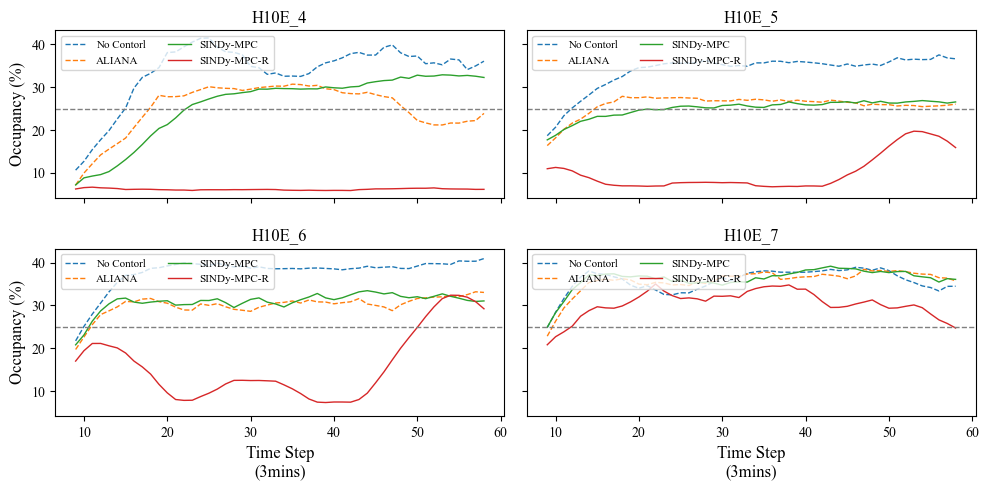

In [73]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(2):
        index = row*2 + col
        # axs[row, col].plot(occupancy_all_random.iloc[:, index], "-", label = 'Ramp Random')
        axs[row, col].plot(occupancy_all_open.iloc[:, index], "--", label = 'No Contorl',linewidth=1)
        axs[row, col].plot(occupancy_all_ALIANA.iloc[:, index], "--", label = 'ALIANA',linewidth=1)
        axs[row, col].plot(occupancy_all_MPC.iloc[:, index], "-", label = 'SINDy-MPC',linewidth=1)
        axs[row, col].plot(occupancy_all_MPC_R.iloc[:, index], "-", label = 'SINDy-MPC-R',linewidth=1)
        # axs[row, col].plot(occupancy_all_MPC_R2.iloc[:, index], "-", label = 'SINDy-MPC-R',linewidth=1)
        axs[row, col].legend(loc='upper left', fontsize=8, ncol=2)
        axs[row, col].axhline(y=25, color='gray', linestyle='--', linewidth=1)  # Adding horizontal dashed line
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=12)

for col in range(2):
    axs[1,col].set_xlabel('Time Step\n(3mins)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('Occupancy (%)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Occu_Plot.png', dpi=300)

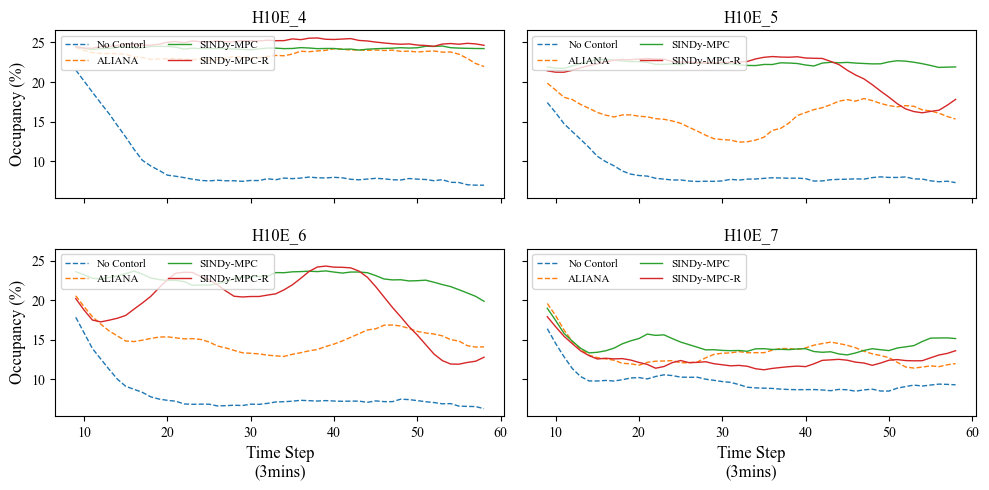

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(2):
        index = row*2 + col
        # axs[row, col].plot(occupancy_all_random.iloc[:, index], "-", label = 'Ramp Random')
        axs[row, col].plot(speed_all_open.iloc[:, index], "--", label = 'No Contorl',linewidth=1)
        axs[row, col].plot(speed_all_ALIANA.iloc[:, index], "--", label = 'ALIANA',linewidth=1)
        axs[row, col].plot(speed_all_MPC.iloc[:, index], "-", label = 'SINDy-MPC',linewidth=1)
        axs[row, col].plot(speed_all_MPC_R.iloc[:, index], "-", label = 'SINDy-MPC-R',linewidth=1)
        # axs[row, col].plot(occupancy_all_MPC_R2.iloc[:, index], "-", label = 'SINDy-MPC-R',linewidth=1)
        axs[row, col].legend(loc='upper left', fontsize=8, ncol=2)
        # axs[row, col].axhline(y=18, color='gray', linestyle='--', linewidth=1)  # Adding horizontal dashed line
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=12)

for col in range(2):
    axs[1,col].set_xlabel('Time Step\n(3mins)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('Occupancy (%)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.05)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Speed_Plot.png', dpi=300)

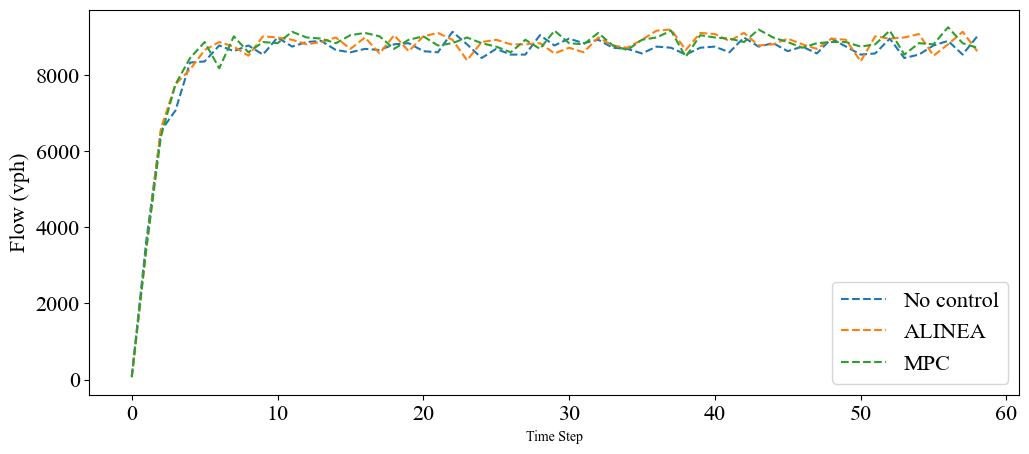

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(flow_inout_open['H10E_out'], linestyle='--', label='No control', linewidth=1.5)
plt.plot(flow_inout_ALIANA['H10E_out'], linestyle='--', label='ALINEA', linewidth=1.5)
plt.plot(flow_inout_MPC['H10E_out'], linestyle='--', label='MPC', linewidth=1.5)
# plt.plot(flow_inout_MPC_R, linestyle='-', label='MPC-R', linewidth=1.5)
plt.xlabel('Time Step')
plt.ylabel('Flow (vph)', fontsize = 16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
# plt.savefig('Figures/Demand_Plot.png', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
flow_all_open_sum = flow_all_open.sum(axis=1)
flow_all_ALIANA_sum = flow_all_ALIANA.sum(axis=1)
flow_all_MPC_sum = flow_all_MPC.sum(axis=1)
# flow_all_MPC_R_sum = flow_all_MPC_R.sum(axis=1)

NameError: name 'flow_all_MPC_R_sum' is not defined

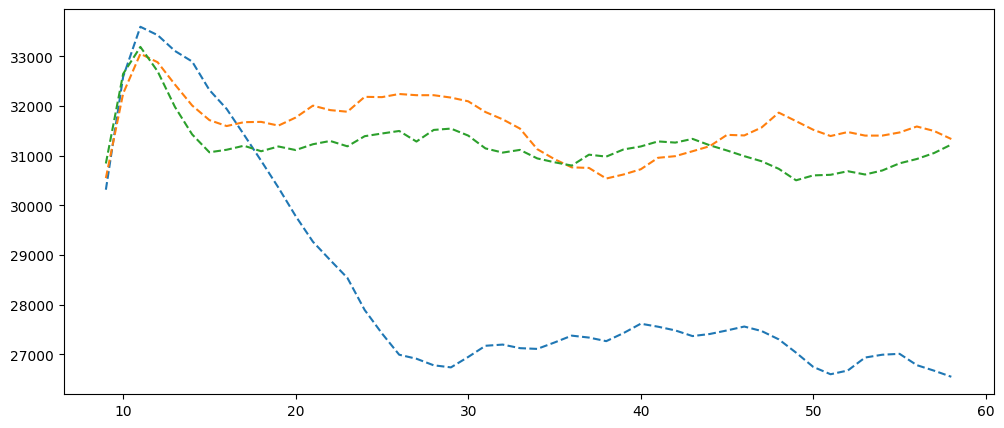

In [244]:
plt.figure(figsize=(12, 5))
plt.plot(flow_all_open_sum, linestyle='--', label='No control', linewidth=1.5)
plt.plot(flow_all_ALIANA_sum, linestyle='--', label='ALINEA', linewidth=1.5)
plt.plot(flow_all_MPC_sum, linestyle='--', label='MPC', linewidth=1.5)
plt.plot(flow_all_MPC_R_sum, linestyle='-', label='MPC-R', linewidth=1.5)
plt.xlabel('Time Step')
plt.ylabel('Flow (vph)', fontsize = 16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
# plt.savefig('Figures/Demand_Plot.png', dpi=300,bbox_inches='tight')
plt.show()

In [216]:
# Plot the demand graph
main_1 = 3000+800+900+800+1000+800
main_2 = 3000+800+900+800+1000+800
main_3 = 5000+1000+1200+1000+800+1000
main_4 = 2000+800+700+600+800+600

ramp_1 = 1000
ramp_2 = 1000
ramp_3 = 1800
ramp_4 = 500

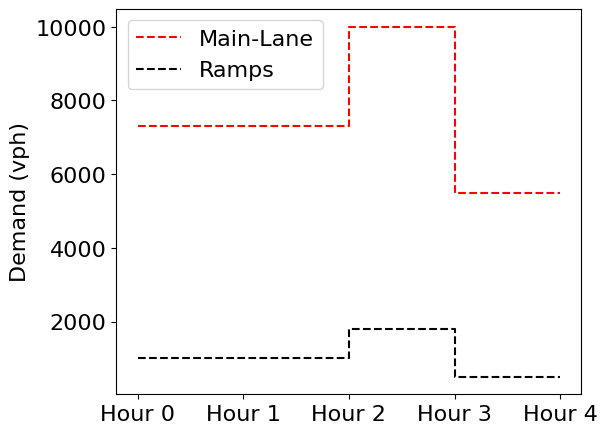

In [217]:
# Data for main lane highway and ramp
main_lane_demand = [main_1, main_2, main_3, main_4]
ramp_demand = [ramp_1, ramp_2, ramp_3, ramp_4]

# Creating new time points for flat segments
time_points = ["Hour 0", "Hour 1", "Hour 1", "Hour 2", "Hour 2", "Hour 3", "Hour 3", "Hour 4"]

# Extending the demand values to remain flat within each hour
extended_main_lane_demand = [
    main_lane_demand[0], main_lane_demand[0],
    main_lane_demand[1], main_lane_demand[1],
    main_lane_demand[2], main_lane_demand[2],
    main_lane_demand[3], main_lane_demand[3]
]

extended_ramp_demand = [
    ramp_demand[0], ramp_demand[0],
    ramp_demand[1], ramp_demand[1],
    ramp_demand[2], ramp_demand[2],
    ramp_demand[3], ramp_demand[3]
]

# Plotting the demand graph with flat segments
plt.figure(figsize=(6, 5))
plt.plot(time_points, extended_main_lane_demand, linestyle='--', label='Main-Lane', linewidth=1.5, color='red')
plt.plot(time_points, extended_ramp_demand, linestyle='--', label='Ramps', linewidth=1.5, color='black')
# plt.xlabel('Time')
plt.ylabel('Demand (vph)', fontsize = 16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.savefig('Figures/Demand_Plot.png', dpi=300,bbox_inches='tight')
plt.show()